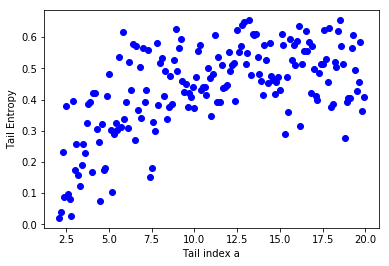

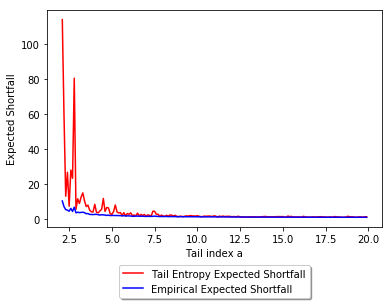

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import pareto
from scipy.stats import norm
from scipy.stats import linregress
from scipy.stats import multinomial
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

def entropy(hist, bit_instead_of_nat=True):

    h = np.asarray(hist, dtype=np.float64)

    h = h/h.sum()
    log_fn = np.ma.log2 if bit_instead_of_nat else np.ma.log
    return -(h*log_fn(h)).sum()



entr=[]
tail_index=[]
ES=[]
TE_ES=[]
Tail_Entropy=[]
a_index=[]
alpha=0.05
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

for a in frange (2.1,20,0.1):

    s =-pareto.rvs(a, size=1000)
    
    q=np.quantile(s,alpha)
    
  
    x=s[s<q]
    es=-np.mean(x)
       
    bins=10
    hist=np.histogram(s, bins)

    p=hist[0].astype(float)/hist[0].sum()     #probability of bins
    bootstrap_ent=[]
    for k in range(1,1000):
        rv=multinomial.rvs(100, p, size=1, random_state=None)
        b_ent=entropy(rv, bit_instead_of_nat=True)/np.log2(bins)
        bootstrap_ent.append(b_ent)
    b0=np.min(hist[1])
    b1=np.max(hist[1])

    ent=2*(entropy(hist[0], bit_instead_of_nat=True)/np.log2(bins))-np.mean(bootstrap_ent)
    te=-(b0+(b1-b0)*ent/2)
    Tail_Entropy.append(ent)
    TE_ES.append(te)

    ES.append(es)
    a_index.append(a)

plt.plot(a_index, Tail_Entropy, 'o',c='blue')
plt.xlabel( 'Tail index a' )
plt.ylabel( 'Tail Entropy' )
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()


plt.plot(a_index,TE_ES, label='Tail Entropy Expected Shortfall', c='red')

plt.plot(a_index, ES, label='Empirical Expected Shortfall', c='blue')
plt.xlabel( 'Tail index a' )
plt.ylabel( 'Expected Shortfall' )
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

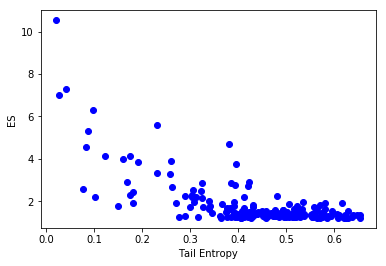

                            OLS Regression Results                            
Dep. Variable:                     ES   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           2.04e-26
Time:                        21:20:46   Log-Likelihood:                -231.20
No. Observations:                 179   AIC:                             466.4
Df Residuals:                     177   BIC:                             472.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4307      0.212     20.863   

In [13]:



plt.plot(Tail_Entropy, ES, 'o',c='blue')
plt.ylabel( 'ES' )
plt.xlabel( 'Tail Entropy' )
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()
Tail_Entropy=pd.DataFrame(Tail_Entropy)
ES=pd.DataFrame(ES)
data=pd.concat([Tail_Entropy, ES], axis=1)
lm = smf.ols(formula = "ES~ Tail_Entropy", data=data).fit()
print (lm.summary())